# **Membangun Model Deteksi Penipuan (Fraud) Kartu Kredit dengan Teknik Machine Learning**

## Tanggal

## Kelompok 3
1. Boy Aditya Rohmaulana (2203488)
2. Defrizal Yahdiyan Risyad (2206131)
3. Muhamad Furqon Al-Haqqi (2207207)
4. Raya Cahya Nurani (2205714)
5. Septiani Eka Putri (2206000

## Pendahuluan


Dulu ketika kartu kredit  tidak menggunakan kode chip dan PIN, sering terjadi penyalahgunaan kartu kredit oleh pihak yang tidak berkepentingan.. Misalnya, jika kartu kredit kita dicuri atau hilang, penjahat bisa langsung menggunakannya. Selain itu, beberapa tempat membuat salinan  kartu kredit secara ilegal sebelum penggunaan chip diterapkan, dan salinan tersebut kemudian digunakan untuk pembelian.  

Berbeda dengan kartu debit yang langsung mengurangi saldo rekening, pembayaran kartu kredit diawasi oleh bank dan harus diotorisasi terlebih dahulu. Oleh karena itu, bank sangat berkepentingan untuk mencegah penyalahgunaan kartu kredit agar tidak terjadi kerugian finansial.

## Preparation

Import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Import Dataset

In [2]:
train = pd.read_csv("fraud_train.txt")

## 1. Data Understanding

Melihat dimensi data

In [3]:
print('Dimensi data: ', train.shape)

Dimensi data:  (13125, 28)


In [4]:
# Mengatur display maksimum kolom yang bisa ditampilkan
pd.set_option('display.max_columns', 28) 

In [5]:
train.head()

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
0,4676,2457646,2457726,111,-2,1798,2605127,26,10,2200000.0,96,5,265,4137,613,193955,4,2,1,9,False,3,999,1.332293e+06,9750000.0,10000.0,2.73,0
1,788,2457419,2457507,111,-2,1798,-3,156,12,2500000.0,96,5,121,1264,2196,73140,2,1,5,8,False,3,999,1.369048e+06,10000000.0,30000.0,2.33,1
2,1520,2457521,2457612,2,-2,1798,-3,156,12,1200000.0,96,5,101,1283,2049,140216,3,1,5,8,False,3,999,1.552346e+07,100000000.0,41804.0,2.40,0
3,9346,2457659,2457746,103,75336,249,2806174,58,6,320000.0,96,5,239,7049,588,155117,3,2,2,4,False,3,999,7.117647e+05,6884408.0,10000.0,1.98,0
4,2914,2457311,2457385,0,-2,1798,2334932,26,10,150000.0,96,5,69,3425,613,143339,3,2,1,9,False,3,999,6.179683e+05,2500000.0,100000.0,1.46,0


In [6]:
train.columns

Index(['X', 'id_tanggal_transaksi_awal', 'tanggal_transaksi_awal',
       'tipe_kartu', 'id_merchant', 'nama_merchant', 'tipe_mesin',
       'tipe_transaksi', 'nama_transaksi', 'nilai_transaksi', 'id_negara',
       'nama_negara', 'nama_kota', 'lokasi_mesin', 'pemilik_mesin',
       'waktu_transaksi', 'kuartal_transaksi', 'kepemilikan_kartu',
       'nama_channel', 'id_channel', 'flag_transaksi_finansial',
       'status_transaksi', 'bank_pemilik_kartu', 'rata_rata_nilai_transaksi',
       'maksimum_nilai_transaksi', 'minimum_nilai_transaksi',
       'rata_rata_jumlah_transaksi', 'flag_transaksi_fraud'],
      dtype='object')

### Penjelasan Fitur
- **X**
- **id_tanggal_transaksi_awal**         
Identifier atau kode yang digunakan untuk mengidentifikasi tanggal awal terjadinya suatu transaksi.
- **tanggal_transaksi_awal**              
Tanggal sebenarnya ketika transaksi dilakukan. Informasi ini berguna untuk melacak waktu dan urutan transaksi serta menganalisis tren transaksi seiring berjalannya waktu.
- **tipe_kartu**                        
Mencakup jenis kartu kredit yang digunakan dalam transaksi, seperti jenis kartu kredit tertentu (Visa, MasterCard, American Express, dsb), dan atribut ini dapat membantu dalam analisis jenis kartu yang lebih rentan terhadap penyalahgunaan.
- **id_merchant**                   
Kode atau identifikasi unik untuk setiap pedagang yang terlibat dalam transaksi. Identifikasi ini membantu dalam menghubungkan transaksi dengan pedagang tertentu.
- **nama_merchant**                 
Nama pedagang atau bisnis yang melakukan transaksi. Informasi ini berguna dalam melacak transaksi ke pedagang tertentu dan menilai apakah pedagang tersebut terkait dengan aktivitas penipuan.
- **tipe_mesin**                           
Informasi mengenai jenis mesin yang digunakan untuk memproses transaksi, yang dapat bervariasi tergantung pada pedagang dan teknologi yang digunakan.
- **tipe_transaksi**                      
Tanggal sebenarnya ketika transaksi dilakukan. Informasi ini berguna untuk melacak waktu dan urutan transaksi serta menganalisis tren transaksi seiring berjalannya waktu.
- **nama_transaksi**                    
Deskripsi atau nama yang lebih rinci tentang transaksi yang dilakukan, seperti "Pembelian di Toko A" atau "Penarikan ATM".
- **nilai_transaksi**                       
Jumlah uang yang terlibat dalam transaksi tersebut. Informasi ini sangat penting dalam mengidentifikasi pola transaksi yang mencurigakan, terutama jika ada transaksi dengan nilai yang tidak wajar.
- **id_negara**                             
Identifier atau kode yang digunakan untuk mengidentifikasi negara di mana transaksi tersebut dilakukan.
- **nama_negara**                           
Nama negara tempat transaksi berlangsung. Informasi ini membantu dalam melacak transaksi lintas batas dan mengidentifikasi aktivitas yang mencurigakan dari negara tertentu.
- **nama_kota**                             
Nama kota atau lokasi di mana transaksi terjadi.
- **lokasi_mesin**                      
Lokasi fisik dari mesin atau terminal yang digunakan dalam transaksi, seperti alamat atau koordinat geografis.
- **pemilik_mesin**                 
Entitas atau individu yang memiliki atau mengoperasikan mesin atau terminal yang digunakan dalam transaksi.
- **waktu_transaksi**                   
Waktu sebenarnya ketika transaksi terjadi. Informasi ini berguna untuk menganalisis pola transaksi harian atau seiring berjalannya waktu.
- **kuartal_transaksi**                     
Penunjuk waktu yang menunjukkan transaksi berada dalam kuartal tahun berapa. Berguna untuk analisis waktu yang lebih besar.
- **kepemilikan_kartu**                         
Status kepemilikan kartu kredit, apakah kartu tersebut dimiliki oleh individu yang melakukan transaksi atau apakah kartu tersebut hilang atau dicuri.
- **nama_channel**                          
Saluran atau metode yang digunakan untuk melakukan transaksi, seperti mesin ATM, toko ritel, atau transaksi online.
- **id_channel**                            
Kode identifikasi untuk setiap saluran atau metode transaksi yang digunakan.
- **flag_transaksi_finansial**                  
Penanda yang menunjukkan apakah transaksi tersebut termasuk dalam kategori finansial atau non-finansial, seperti pembelian barang atau pembayaran tagihan.
- **status_transaksi**                      
Status transaksi, seperti "berhasil," "gagal," atau "ditolak."
- **bank_pemilik_kartu**                    
Lembaga keuangan atau bank yang menerbitkan kartu kredit yang digunakan dalam transaksi.
- **rata_rata_nilai_transaksi**                 
Rata-rata dari nilai transaksi selama periode waktu tertentu, yang dapat membantu dalam menganalisis tren atau perubahan dalam nilai transaksi.
- **maksimum_nilai_transaksi**                  
Nilai transaksi tertinggi yang tercatat dalam data transaksi.
- **minimum_nilai_transaksi**                   
Nilai transaksi terendah yang tercatat dalam data transaksi.
- **rata_rata_jumlah_transaksi**                
Rata-rata jumlah transaksi yang dilakukan selama periode waktu tertentu.
- **flag_transaksi_fraud**                      
Penanda yang menunjukkan apakah transaksi tersebut diidentifikasi sebagai transaksi penipuan atau bukan. Ini adalah atribut penting dalam menangani permasalahan penyalahgunaan kartu kredit dan mencegahnya.

Melihat Informasi Data

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   X                           13125 non-null  int64  
 1   id_tanggal_transaksi_awal   13125 non-null  int64  
 2   tanggal_transaksi_awal      13125 non-null  int64  
 3   tipe_kartu                  13125 non-null  int64  
 4   id_merchant                 13125 non-null  int64  
 5   nama_merchant               13125 non-null  int64  
 6   tipe_mesin                  13125 non-null  int64  
 7   tipe_transaksi              13125 non-null  int64  
 8   nama_transaksi              13125 non-null  int64  
 9   nilai_transaksi             13125 non-null  float64
 10  id_negara                   13125 non-null  int64  
 11  nama_negara                 13125 non-null  int64  
 12  nama_kota                   13125 non-null  int64  
 13  lokasi_mesin                131

Melihat Ringkasan Statistik Deskriptif

In [8]:
train.describe()

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
count,13125.000000,1.312500e+04,1.312500e+04,13125.000000,13125.000000,13125.000000,1.312500e+04,13125.000000,13125.000000,1.312500e+04,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.0,13125.0,1.310400e+04,1.310400e+04,1.310400e+04,13104.000000,13125.000000
mean,7507.821943,2.457490e+06,2.457541e+06,85.340114,39300.900876,1678.483886,1.649037e+06,178.778362,10.729524,1.315219e+06,96.057981,5.019581,148.295543,3947.520457,766.033448,138895.669638,2.854857,1.932267,1.404267,8.237410,3.0,999.0,1.364132e+06,1.228760e+07,7.651933e+04,2.436182,0.069333
std,4326.959832,1.047995e+02,1.088401e+02,40.921347,124187.745686,361.236161,9.914309e+05,142.504458,3.891783,2.838050e+06,3.566912,0.417351,70.112724,2405.917886,466.132889,47872.569599,0.825276,0.251297,1.013583,1.721997,0.0,0.0,1.448583e+06,1.645905e+07,6.765391e+05,1.389367,0.254030
min,1.000000,2.457297e+06,2.457303e+06,0.000000,-2.000000,2.000000,-4.000000e+00,26.000000,1.000000,1.000000e+00,-2.000000,1.000000,1.000000,2.000000,1.000000,47.000000,1.000000,1.000000,1.000000,3.000000,3.0,999.0,5.000000e+04,3.800000e+04,1.000000e+00,1.000000,0.000000
25%,3784.000000,2.457404e+06,2.457451e+06,93.000000,-2.000000,1798.000000,1.130699e+06,26.000000,9.000000,2.000000e+05,96.000000,5.000000,102.000000,1914.000000,613.000000,102622.000000,2.000000,2.000000,1.000000,9.000000,3.0,999.0,5.685634e+05,2.500000e+06,2.500000e+04,1.680000,0.000000
50%,7475.000000,2.457500e+06,2.457543e+06,103.000000,-2.000000,1798.000000,1.836319e+06,156.000000,10.000000,5.700000e+05,96.000000,5.000000,128.000000,3720.000000,613.000000,140707.000000,3.000000,2.000000,1.000000,9.000000,3.0,999.0,1.024239e+06,6.000000e+06,3.696400e+04,2.100000,0.000000
75%,11265.000000,2.457581e+06,2.457632e+06,111.000000,-2.000000,1798.000000,2.419350e+06,301.000000,11.000000,1.250000e+06,96.000000,5.000000,203.000000,5637.000000,613.000000,175420.000000,3.000000,2.000000,1.000000,9.000000,3.0,999.0,1.679778e+06,1.500000e+07,6.320000e+04,2.790000,0.000000
max,15000.000000,2.457662e+06,2.457754e+06,138.000000,720990.000000,1859.000000,6.928943e+06,640.000000,20.000000,7.500000e+07,216.000000,16.000000,293.000000,8697.000000,2688.000000,235914.000000,4.000000,2.000000,5.000000,9.000000,3.0,999.0,2.466667e+07,1.000000e+08,7.500000e+07,19.780000,1.000000


## 2. Data Preperation

- Menghapus kolom yang tidak relevan
- Memeriksa data duplikat
- Nilai hilang/rusak
- Tipe data
- Outlier
- Feature Engineering

### **Menghapus kolom yang tidak relevan**

In [9]:
train.head()

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
0,4676,2457646,2457726,111,-2,1798,2605127,26,10,2200000.0,96,5,265,4137,613,193955,4,2,1,9,False,3,999,1.332293e+06,9750000.0,10000.0,2.73,0
1,788,2457419,2457507,111,-2,1798,-3,156,12,2500000.0,96,5,121,1264,2196,73140,2,1,5,8,False,3,999,1.369048e+06,10000000.0,30000.0,2.33,1
2,1520,2457521,2457612,2,-2,1798,-3,156,12,1200000.0,96,5,101,1283,2049,140216,3,1,5,8,False,3,999,1.552346e+07,100000000.0,41804.0,2.40,0
3,9346,2457659,2457746,103,75336,249,2806174,58,6,320000.0,96,5,239,7049,588,155117,3,2,2,4,False,3,999,7.117647e+05,6884408.0,10000.0,1.98,0
4,2914,2457311,2457385,0,-2,1798,2334932,26,10,150000.0,96,5,69,3425,613,143339,3,2,1,9,False,3,999,6.179683e+05,2500000.0,100000.0,1.46,0


#### Menghapus Kolom yang memiliki nilai yang sama.
Kolom yang memiliki nilai yang sama untuk setiap baris tidak memberikan informasi yang bermanfaat dalam analisis

In [10]:
# Fungsi untuk mengecek kolom mana saja yang memiliki semua nilai sama
def kolom_semua_nilai_sama(train):
    kolom_sama = []
    for kolom in train.columns:
        if train[kolom].nunique() == 1:
            kolom_sama.append(kolom)
    return kolom_sama


kolom_semua_sama = kolom_semua_nilai_sama(train)
print(f"Kolom dengan semua nilai sama: {kolom_semua_sama}")

Kolom dengan semua nilai sama: ['flag_transaksi_finansial', 'status_transaksi', 'bank_pemilik_kartu']


In [11]:
train.drop(columns=kolom_semua_sama, inplace=True)

#### Menghapus Kolom yang Mungkin Berlebihan
Kolom-kolom ini memiliki banyak nilai unik dan mungkin tidak memberikan informasi yang signifikan

In [12]:
train.drop(columns=['X', 'id_tanggal_transaksi_awal', 'tipe_mesin', 'lokasi_mesin', 'pemilik_mesin'], inplace=True)

#### Menghapus Kolom yang Redundan
Kolom-kolom ini memberikan informasi yang sama atau sangat mirip dengan kolom lain dalam dataset.

In [13]:
train.drop(columns=['nama_merchant', 'nama_negara', 'nama_transaksi', 'nama_channel'], inplace=True)

### **Memeriksa Data Duplikat**

In [14]:
train[train.duplicated()]

,tanggal_transaksi_awal,tipe_kartu,id_merchant,tipe_transaksi,nilai_transaksi,id_negara,nama_kota,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,id_channel,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud


Tidak ada data yang duplikat

### **Memeriksa data yang hilang atau null**

Melihat jumlah data yang null

In [15]:
train.isna().sum()

tanggal_transaksi_awal         0
tipe_kartu                     0
id_merchant                    0
tipe_transaksi                 0
nilai_transaksi                0
id_negara                      0
nama_kota                      0
waktu_transaksi                0
kuartal_transaksi              0
kepemilikan_kartu              0
id_channel                     0
rata_rata_nilai_transaksi     21
maksimum_nilai_transaksi      21
minimum_nilai_transaksi       21
rata_rata_jumlah_transaksi    21
flag_transaksi_fraud           0
dtype: int64

Terdapat 21 baris data yang memiliki nilai null pada kolom-kolom tersebut, yang dimana kolom-kolom tersebut adalah kolom yang sangat membantu kemampuan klasifikasi sebuah model. Hal yang bisa dilakukan adalah menghapusnya atau imputasi nilai. Pertimbangannya adalah jika dilakukan imputasi nilai pada kolom-kolom tersebut, dikhawatirkan akan menyebabkan berkurangnya akurasi pada model. Sehingga diputuskan untuk menghapusnya saja, selain itu karena baris data yang akan terhapus pun cukup sedikit sehingga tidak terlalu mempengaruhi hasil.

In [16]:
train.dropna(inplace=True)

### **Tipe Data**

#### Melakukan konversi tipe data

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13104 entries, 0 to 13124
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tanggal_transaksi_awal      13104 non-null  int64  
 1   tipe_kartu                  13104 non-null  int64  
 2   id_merchant                 13104 non-null  int64  
 3   tipe_transaksi              13104 non-null  int64  
 4   nilai_transaksi             13104 non-null  float64
 5   id_negara                   13104 non-null  int64  
 6   nama_kota                   13104 non-null  int64  
 7   waktu_transaksi             13104 non-null  int64  
 8   kuartal_transaksi           13104 non-null  int64  
 9   kepemilikan_kartu           13104 non-null  int64  
 10  id_channel                  13104 non-null  int64  
 11  rata_rata_nilai_transaksi   13104 non-null  float64
 12  maksimum_nilai_transaksi    13104 non-null  float64
 13  minimum_nilai_transaksi     13104 no

Mengubah kolom-kolom yang seharusnya memiliki tipe data kategori

In [18]:
kolom_kategori = [
    "tipe_kartu",
    "id_merchant",
    "tipe_transaksi",
    "id_negara",
    "nama_kota",
    "kuartal_transaksi",
    "kepemilikan_kartu",
    "id_channel",
    "flag_transaksi_fraud",
]

train[kolom_kategori] = train[kolom_kategori].astype("category")


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13104 entries, 0 to 13124
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tanggal_transaksi_awal      13104 non-null  int64   
 1   tipe_kartu                  13104 non-null  category
 2   id_merchant                 13104 non-null  category
 3   tipe_transaksi              13104 non-null  category
 4   nilai_transaksi             13104 non-null  float64 
 5   id_negara                   13104 non-null  category
 6   nama_kota                   13104 non-null  category
 7   waktu_transaksi             13104 non-null  int64   
 8   kuartal_transaksi           13104 non-null  category
 9   kepemilikan_kartu           13104 non-null  category
 10  id_channel                  13104 non-null  category
 11  rata_rata_nilai_transaksi   13104 non-null  float64 
 12  maksimum_nilai_transaksi    13104 non-null  float64 
 13  minimum_nilai_transak

#### Mengubah format tanggal dan waktu

In [20]:
train[['tanggal_transaksi_awal']]

,tanggal_transaksi_awal
0,2457726
1,2457507
2,2457612
3,2457746
4,2457385
...,...
13120,2457583
13121,2457517
13122,2457712
13123,2457526


Tanggal tersebut tampaknya merupakan angka Julian. Angka Julian adalah cara untuk menggambarkan tanggal sebagai angka, di mana 0 mewakili tanggal Julian tertentu (biasanya tanggal Julian tertentu dalam kalender Gregorian) dan kemudian Anda menambahkan jumlah hari ke tanggal tersebut.

In [21]:
# Fungsi untuk mengonversi tanggal Julian menjadi tanggal yang masuk akal
def convert_julian_to_date(julian_date):
    return pd.to_datetime(julian_date, origin='julian', unit='D')

# Terapkan fungsi pada kolom tanggal
train['tanggal_transaksi_awal'] = train['tanggal_transaksi_awal'].apply(convert_julian_to_date).dt.date

In [22]:
train.head()

,tanggal_transaksi_awal,tipe_kartu,id_merchant,tipe_transaksi,nilai_transaksi,id_negara,nama_kota,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,id_channel,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
0,2016-12-03,111,-2,26,2200000.0,96,265,193955,4,2,9,1.332293e+06,9750000.0,10000.0,2.73,0
1,2016-04-28,111,-2,156,2500000.0,96,121,73140,2,1,8,1.369048e+06,10000000.0,30000.0,2.33,1
2,2016-08-11,2,-2,156,1200000.0,96,101,140216,3,1,8,1.552346e+07,100000000.0,41804.0,2.40,0
3,2016-12-23,103,75336,58,320000.0,96,239,155117,3,2,4,7.117647e+05,6884408.0,10000.0,1.98,0
4,2015-12-28,0,-2,26,150000.0,96,69,143339,3,2,9,6.179683e+05,2500000.0,100000.0,1.46,0


#### Mengubah format waktu transaksi

In [23]:
train[['waktu_transaksi']]

,waktu_transaksi
0,193955
1,73140
2,140216
3,155117
4,143339
...,...
13120,140547
13121,172446
13122,141836
13123,71451


In [24]:
# Ubah kolom waktu menjadi string
train['waktu_transaksi'] = train['waktu_transaksi'].astype(str)

# Pastikan panjang string selalu 6 karakter dengan tambahan nol di depan jika perlu
train['waktu_transaksi'] = train['waktu_transaksi'].str.zfill(6)

# Pisahkan jam, menit, dan detik dari string
train['jam'] = train['waktu_transaksi'].str[:2]
train['menit'] = train['waktu_transaksi'].str[2:4]
train['detik'] = train['waktu_transaksi'].str[4:]

# Gabungkan jam, menit, dan detik dalam format HH:MM:SS
train['waktu_transaksi'] = train['jam'] + ':' + train['menit'] + ':' + train['detik']

# Hapus kolom jam, menit, dan detik jika diperlukan
train = train.drop(columns=['jam', 'menit', 'detik'])


In [25]:
train.head()

,tanggal_transaksi_awal,tipe_kartu,id_merchant,tipe_transaksi,nilai_transaksi,id_negara,nama_kota,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,id_channel,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
0,2016-12-03,111,-2,26,2200000.0,96,265,19:39:55,4,2,9,1.332293e+06,9750000.0,10000.0,2.73,0
1,2016-04-28,111,-2,156,2500000.0,96,121,07:31:40,2,1,8,1.369048e+06,10000000.0,30000.0,2.33,1
2,2016-08-11,2,-2,156,1200000.0,96,101,14:02:16,3,1,8,1.552346e+07,100000000.0,41804.0,2.40,0
3,2016-12-23,103,75336,58,320000.0,96,239,15:51:17,3,2,4,7.117647e+05,6884408.0,10000.0,1.98,0
4,2015-12-28,0,-2,26,150000.0,96,69,14:33:39,3,2,9,6.179683e+05,2500000.0,100000.0,1.46,0


### Class Imbalance

In [26]:
Total_transactions = len(train)
normal = len(train[train['flag_transaksi_fraud'] == 0])
fraudulent = len(train[train['flag_transaksi_fraud'] == 1])
fraud_percentage = round(fraudulent/Total_transactions*100, 2)
print('Jumlah total Transaksi adalah {}'.format(Total_transactions))
print('Jumlah Transaksi Normal adalah {}'.format(normal))
print('Jumlah transaksi fraud adalah {}'.format(fraudulent))
print('Persentase Transaksi Fraud adalah {}'.format(fraud_percentage))

Jumlah total Transaksi adalah 13104
Jumlah Transaksi Normal adalah 12210
Jumlah transaksi fraud adalah 894
Persentase Transaksi Fraud adalah 6.82


In [27]:
normal_percentage = round(normal/Total_transactions*100, 2)
print('Persentase Transaksi Normal adalah {}'.format(normal_percentage))

Persentase Transaksi Normal adalah 93.18


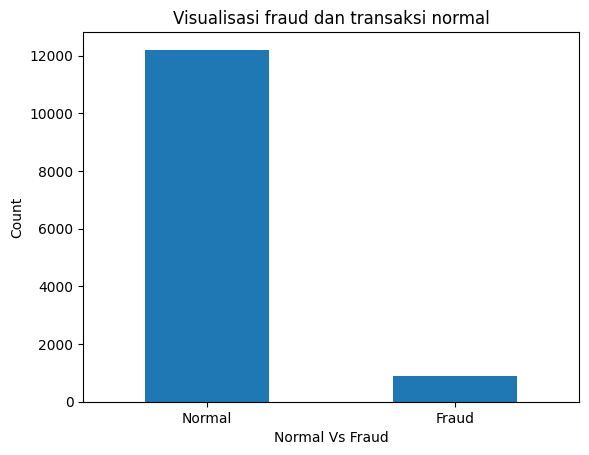

In [28]:
# Visualize
labels = ["Normal", "Fraud"]
count_classes = train.value_counts(train['flag_transaksi_fraud'], sort=True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualisasi fraud dan transaksi normal")
plt.ylabel("Count")
plt.xlabel("Normal Vs Fraud")
plt.xticks(range(2), labels)
plt.show()

Seperti yang bisa kita lihat dari gambar di atas, terdapat perbedaan yang sangat besar antar transaksinya.

Hanya 6,82% (894) transaksi dalam dataset yang merupakan fraud yang menunjukkan ketidakseimbangan dalam dataset.

### Outlier
Sebelum menghapus outlier kita dapat mengecek terlebih dahulu dengan boxplot masing - masing outliner dari tiap atribut 

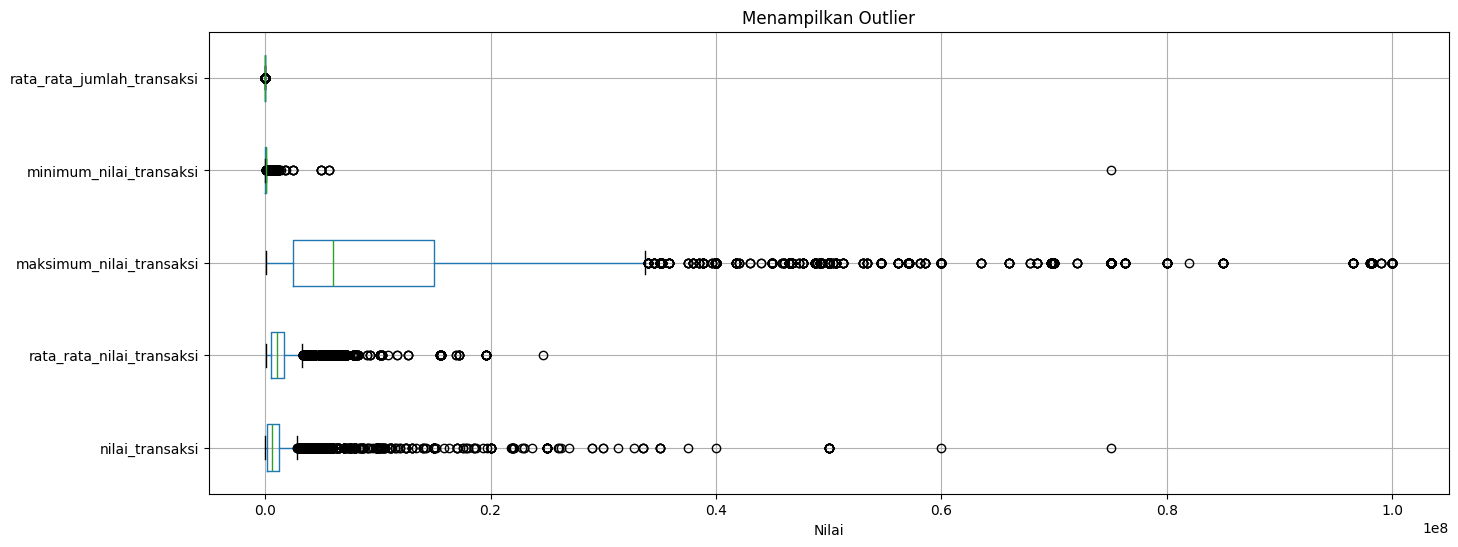

In [29]:
# Buat box plot untuk masing-masing atribut
plt.figure(figsize=(16, 6))
train.boxplot(vert=False)
plt.title('Menampilkan Outlier')
plt.xlabel('Nilai')
plt.show()

Dapat kita lihat beberapa outlier dari masing - masing atribut

##### Menghihtung rumus IQR (Rentang Interquartil) dan menghapus outlier

In [30]:
def remove_outliers(train, columns):
    for column in columns:
        Q1 = train[column].quantile(0.25)
        Q3 = train[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        train = train[(train[column] >= lower_bound) & (train[column] <= upper_bound)]
    return train

outlier_columns = ['rata_rata_jumlah_transaksi',
                   'minimum_nilai_transaksi', 
                   'maksimum_nilai_transaksi', 
                   'rata_rata_nilai_transaksi',
                   ]
df_no_outliers = remove_outliers(train, outlier_columns)

Menampilakn hasil outlier yang dihapus dengan menampilkan boxplot

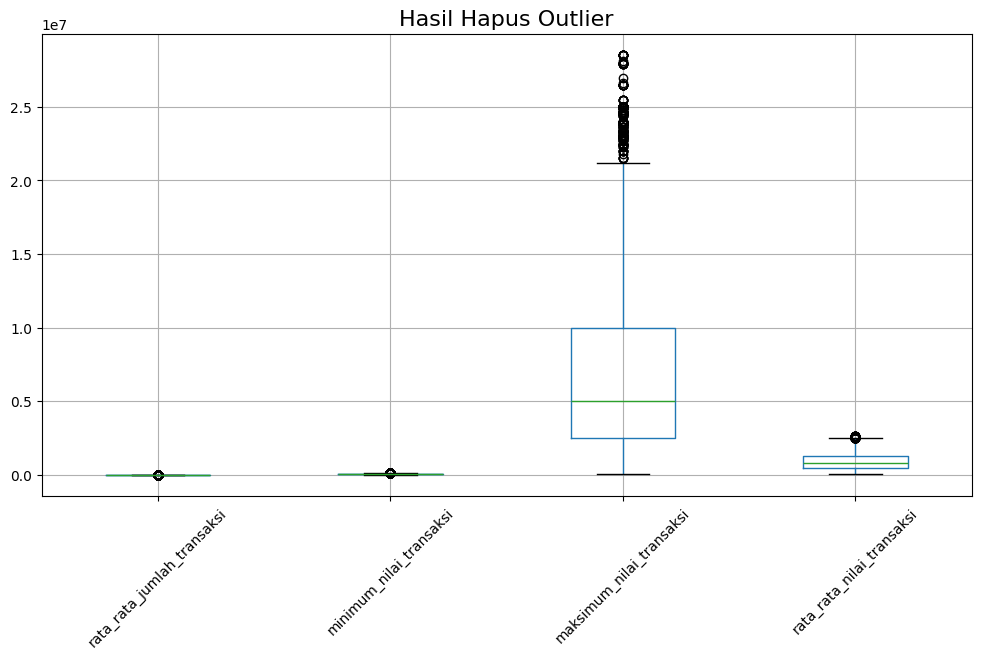

In [31]:
plt.figure(figsize=(12, 6))  # Mengatur ukuran gambar
# Membuat box plot untuk setiap atribut dalam df_no_outliers
df_no_outliers.boxplot(column=outlier_columns)
plt.title('Hasil Hapus Outlier', size=16)
plt.xticks(rotation=45)
plt.show()

Dari boxplot di atas kita dapat melihat perbedaan outlier yang dihapus dengan yang tidak dihapus